# Pokemon Analysis

There have been controversies of what is the best pokemon, this pokemon is this, this pokemon is that, but what pokemon is the best? Today, that's we are going to find out. Today we are going to analyze what is the best pokemon, the best pokemon type, the best everything, the most optimal the best starter. 

Instead of catching them all, we are going to analyze them all...



![image](pokemon.png)

## Table of Contents

First let's import the packages

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
pokemon = pd.read_csv("./pokemon.csv")

In [77]:
pokemon.drop(columns=["index_name"])

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,250
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,270
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,170
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,220


Let's see if any stats are correlated with each other

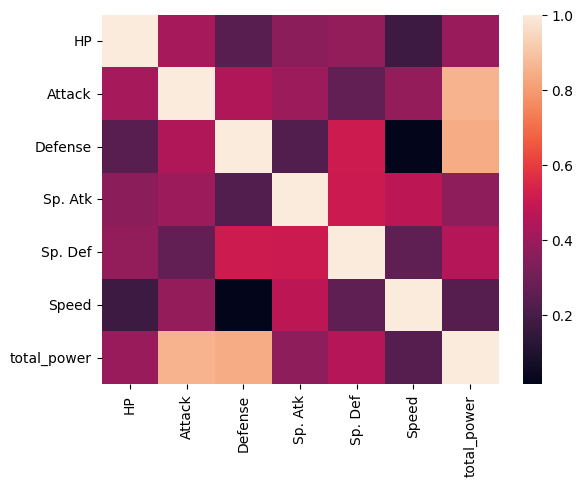

In [58]:
stats = pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "total_power"]]
sns.heatmap(stats.corr())
plt.show()

It seems like attack and defense are highly correlated with the total_power which makes sense

Now lets find out the total amount of types that we have in our pokedex

In [13]:
pokemon_types = pokemon['Type 1'].unique()

In [15]:
pokemon_types_counts = pokemon['Type 1'].value_counts()

In [16]:
pokemon_types_counts

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [ ]:
plt.hist()

Wow, we have a lot of water types, more common than normal types which is ironic being that normal is less normal than water. 

Okay now let's find the strongest pokemon by generation through average total power

In [36]:
generation_stats = pokemon.groupby("Generation")[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "total_power"]].mean()

In [39]:
generation_stats.sort_values(by="total_power", ascending=False)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Generation,,,,,,,
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,161.000000
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,155.725000
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,154.393939
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,152.487805
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,147.500000
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,145.415094


We can see that the strongest pokemon we have is in generation 4, which is the Sinnoh region

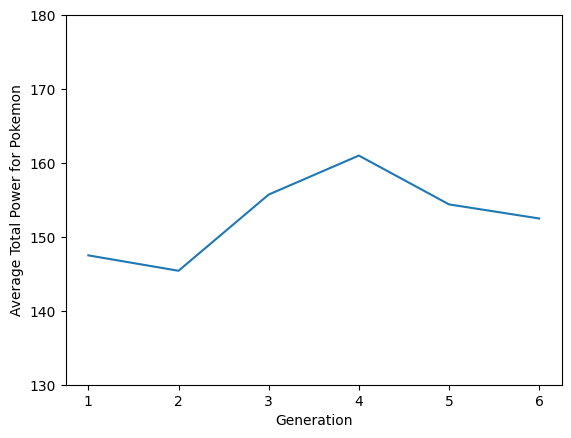

In [61]:
plt.plot(np.arange(1, 7), generation_stats["total_power"])
plt.ylim(130, 180)
plt.xlabel("Generation")
plt.ylabel("Average Total Power for Pokemon")
plt.show()

Okay we know the strongest region on average, what about the strongest type by average. Let's analyze every strongest type in each respective categories. 

In [24]:
mean_stats = pokemon.groupby("Type 1")[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "total_power"]].mean()
mean_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,141.695652
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,158.612903
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,135.386364
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,127.235294
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,162.703704
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,152.538462
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,145.000000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,154.968750


In [26]:
mean_stats.sort_values(["total_power"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,219.074074
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,193.659091
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,180.593750
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,162.703704


In [27]:
mean_stats.sort_values(["Speed"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,145.000000
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,135.386364
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,139.140351
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,158.612903


In [28]:
mean_stats.sort_values(["HP"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Normal,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,133.316327
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,127.235294
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,180.593750
Water,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,147.098214


In [29]:
mean_stats.sort_values(["Attack"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,162.703704
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,180.593750
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,193.659091
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,219.074074


In [30]:
mean_stats.sort_values(["Defense"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,219.074074
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,193.659091
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,180.593750
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,154.968750


In [31]:
mean_stats.sort_values(["Sp. Atk"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,139.140351
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,145.000000
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,135.386364
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,152.538462


In [32]:
mean_stats.sort_values(["Sp. Def"], ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,198.500000
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,139.140351
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,127.235294
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,219.074074
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,154.968750


With Dragon being in the top 5 for each stat, we can assume that Dragon type seems to be the strongest pokemon type out of all, and probably the most reliable. So would that mean Dragon types from the 4th generation would be the best type of pokemon to hav eto conquer the pokemon regions???

Let's take a step back and analyze the first pokemon we ever get, our starters, and see which ones are the best. 

In [40]:
mean_stats.loc[["Water", "Fire", "Grass"]]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total_power
Type 1,,,,,,,
Water,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,147.098214
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,152.538462
Grass,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,144.014286


According the overall pokemon that are in the pokedex, on average, fire type pokemon seems to be the best type but does that translate to the starters? Let's see

Here we have all the starters in our dataset, and let's order them by generation, and by the total power

In [49]:
starters = ["Venusaur", "Charizard", "Blastoise", "Meganium", "Typhlosion", "Feraligatr", "Swampert", 
  "Sceptile", "Blaziken", "Torterra", "Infernape", "Empoleon", "Serperior", "Emboar", "Samurott", "Chesnaught", "Delphox", "Greninja"]

In [50]:
starter_stats = pokemon[pokemon['Name'].isin(starters)]

In [51]:
starter_stats.sort_values(by=["Generation", "total_power"], ascending=[True, False])

,index_name,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,183
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162
174,175,Feraligatr,Water,NaN,85,105,100,79,83,78,2,False,205
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,2,False,182
171,172,Typhlosion,Fire,NaN,78,84,78,109,85,100,2,False,162
282,283,Swampert,Water,Ground,100,110,90,85,90,60,3,False,200
278,279,Blaziken,Fire,Fighting,80,120,70,110,70,80,3,False,190
274,275,Sceptile,Grass,NaN,70,85,65,105,85,120,3,False,150
434,435,Torterra,Grass,Ground,95,109,105,75,85,56,4,False,214


As we can see see the strongest starters in most generations are actually water types in generation 1, generation 2, generation 3, so we can assume that the average stats would not apply to the starters

According to the total_power the best starters to pick for each generation would be as follows:
(These are the first evolutions of the pokemon listed above)

- **squirtle**
- **totadile**
- **mudkip**
- **turtwig**
- **tepig**
- **chespin**

In [81]:
pokemon_not_legendary = pokemon[pokemon["Legendary"] == False]
pokemon_not_legendary.sort_values(by=["total_power"], ascending=[False], inplace=True)


C:\Users\johnc\AppData\Local\Temp\ipykernel_1700\4205397680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_not_legendary.sort_values(by=["total_power"], ascending=[False], inplace=True)


In [82]:
pokemon_not_legendary.head(10)

,index_name,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,370
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False,355
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,314
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False,301
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,300
413,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,295
229,230,Mega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,290
332,333,Aggron,Steel,Rock,70,110,180,60,60,50,3,False,290
494,495,Mega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,285
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,2,False,285


After analyzing the best non legendary pokemon, we can actually see that the best non legendary pokemon aren't actually from Generation 4, but we see a lot of generation 2, and generation 3. However there is one generation 4 here in the strongest list, and the strongest non legendary pokemon from gen 4 we can see is actually a dragon type so the stats are not too far off 